# Lead Brick Experiment

**Run $408 , 425+$:** Calibration Data

**Run $410 - 422$:** Lead Brick Data (1.3 M Events)

## Objectives:
- Identify the best cuts to generate the "best" tomogram
- Calculate Resolution
- Create stand alone test code that generates tomogram easily
    - easy for Dr. Akchurin to check as well
--- 

## Data Frame Initialization

### Creating the Necessary Muon Data Frame Objects

In [1]:
r1,r2 = 425, 435
no_lead_files = ["processed_data/run408"] +  ["processed_data/run{}.csv".format(i) for i in range(r1,r2+1)]

r1,r2 = 410, 421
lead_files = ["processed_data/run{}".format(i) for i in range(r1,r2+1)] + ["processed_data/run422.csv"]

In [2]:
from MuDataFrame import *

mdfo_c = [] #collection of objects

for file in lead_files:
    mdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

In [3]:
mdfo_c

In [4]:
bdfo_c = [] #collection of objects

for file in no_lead_files:
    bdfo_c.append(MuDataFrame(file)) #Muon Data Frame Object for Lead

In [5]:
bdfo_c

### Combining All Lead Brick and Non-Lead Brick Muon Data Frame Objects

In [39]:
import copy

mdf_list = [i.events_df for i in mdfo_c]
mdf_lead = mdfo_c[0].getMergedMDF(mdf_list)

mdfo_lead = copy.copy(mdfo_c[0])
mdfo_lead.events_df = mdf_lead

In [7]:
num_events_lead = len(mdf_lead.index)/(10**6) #Millions
num_events_lead

1.3

In [8]:
mdf_list = [i.events_df for i in bdfo_c]
mdf_calib = bdfo_c[0].getMergedMDF(mdf_list)

mdfo_calib = copy.copy(bdfo_c[0])
mdfo_calib.events_df = mdf_calib

NameError: name 'bdfo_c' is not defined

In [9]:
num_events_calib = len(mdf_calib.index)/(10**6) #Millions
num_events_calib

1.3

We have 1.3 Million events with lead brick installation and 1.3 Million events with no lead bricks.

### Fixing the Angle Calculation Issue

In [10]:
def fixedAnglesDf(df,dfo):
        df['theta_x1'] = dfo.events_df.eval("asymL2/asymL1") * (180 / np.pi)
        df['theta_y1'] = dfo.events_df.eval("asymL1/asymL2") * (180 / np.pi)
        df['theta_x2'] = dfo.events_df.eval("asymL4/asymL3") * (180 / np.pi)
        df['theta_y2'] = dfo.events_df.eval("asymL3/asymL4") * (180 / np.pi)
        # process Z
        asymT1 = df['asymL1'].values
        asymT2 = df['asymL2'].values
        asymT3 = df['asymL3'].values
        asymT4 = df['asymL4'].values
        zangles = np.arctan(
            np.sqrt((asymT1 - asymT3)**2 +
                    (asymT2 - asymT4)**2) / dfo.d_asym) * (180 / np.pi)
        df["z_angle"] = zangles
        return df

In [43]:
#calibration
mdfo_calib.events_df = fixedAnglesDf(mdfo_calib.events_df,mdfo_calib)

#leadbricks
mdfo_lead.events_df = fixedAnglesDf(mdfo_lead.events_df,mdfo_lead)

## Changin event times to serial time

In [44]:
from datetime import datetime, timedelta
times_lead =  np.array([datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in mdfo_lead.events_df["event_time"].values])

In [35]:
from datetime import datetime, timedelta
times_calib436 =  np.array([datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in mdfoc_436.events_df["event_time"].values])

In [45]:
times_calib =  np.array([datetime.strptime(date, '%Y-%m-%d %H:%M:%S.%f') for date in mdfo_calib.events_df["event_time"].values])

In [37]:
times_l436 = [mdfo_calib.get("event_time")[-1]]

for i in range(1,len(times_calib436)):
    del_t = times_calib436[i] - times_calib436[i-1]
    times_l436.append(del_t.microseconds+ times_l436[i-1])

In [46]:
times_l1 = [0]
times_l2 = [0]

for i in range(1,len(times_lead)):
    del_t = times_lead[i] - times_lead[i-1]
    times_l1.append(del_t.microseconds + times_l1[i-1])
    
for i in range(1,len(times_calib)):
    del_t = times_calib[i] - times_calib[i-1]
    times_l2.append(del_t.microseconds+ times_l2[i-1])

In [47]:
mdfo_lead.events_df["event_time"] = times_l1
mdfo_calib.events_df["event_time"] = times_l2

In [38]:
mdfoc_436.events_df["event_time"] = times_l436

<ipython-input-38-ad6ad4017c1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdfoc_436.events_df["event_time"] = times_l436


In [39]:
mdfo_calib.show()

,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,r3hit,...,numLHit,theta_x1,theta_y1,theta_x2,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy
0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,22.205541,147.837258,-43.653927,-75.200711,6.371653,NaN,408,8.402778,8.285486
1,1,94137,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-201.513449,-16.290756,-236.082169,-13.905355,11.086497,NaN,408,-8.389304,29.851975
2,2,259967,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,96.649159,33.966218,24.062017,136.431052,6.613531,NaN,408,-4.230215,-16.106861
3,3,540068,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,14.648016,224.112695,24.072851,136.369656,11.331981,NaN,408,-29.130160,-7.886501
4,4,650077,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-260.859860,-12.584559,-23.756787,-138.183939,15.394396,NaN,408,12.760181,-29.695749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224995,1224995,388015892888,0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,4.0,NaN,NaN,-0.000000,-inf,NaN,NaN,435,NaN,NaN
1224996,1224996,388016332924,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-104.242982,-31.491869,-46.294481,-70.911397,4.632962,NaN,435,13.728270,-28.834539
1224997,1224997,388017093006,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-43.405894,-75.630429,50.796557,64.626553,10.834036,NaN,435,31.021549,-25.438716
1224998,1224998,388017373333,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-82.992069,-39.555664,39.252050,83.634009,12.098594,NaN,435,11.296450,-28.192389


In [10]:
toDays = 0.00000000001157407 
duration_lead = (mdfo_lead.get("event_time")[-1] - mdfo_lead.get("event_time")[0])*toDays
duration_calib = (mdfo_calib.get("event_time")[-1] - mdfo_calib.get("event_time")[0])*toDays

In [11]:
duration_lead, duration_calib

(4.80409327312524, 4.780246765871065)

The lead experiment lasted 4.80409327312524 days while calibration experiment has taken 4.132068114122623 days so far.

In [12]:
mu_rate_lead = num_events_lead / duration_lead #million per day
mu_rate_lead

0.2706025728668466

In [13]:
mu_rate_calib = num_events_calib / duration_calib #million per day
mu_rate_calib

0.27195248774214936

The muon rate for with bricks is $0.271$ Million Events per day,  while without is $0.272$ Million Events per day.

---

## Tomogram Generation

Testing of new equations.

Zplane of T1 and T2 are defined to be $0$ while that of T3 and T4 are defined to be $-d_{sep}$. Zplane of bricks are $d_{brick}$.

In [1]:
def getPhysicalUnits(asym):
    return (55 / 0.6) * asym

def getXatZPlane(x1,x2,zplane,dsep):
    x = (zplane/dsep)*(getPhysicalUnits(x1)-getPhysicalUnits(x2))+getPhysicalUnits(x1)
    return x

In [2]:
import scipy.interpolate, scipy.optimize

def getLeadDistanceinXArr(xx_lead,xx_calib,bins):
    b1 = plt.hist(xx_lead,bins=bins,density=True,range=(-50,50))
    b2 = plt.hist(xx_calib,bins=bins,density=True,range=(-50,50))
    x  = np.array([i*5 for i in range(1,12)])
    y1 = [1 for i in range(len(x))]
    y2 = b1[0]/b2[0]
    interp1 = scipy.interpolate.InterpolatedUnivariateSpline(x, y1)
    interp2 = scipy.interpolate.InterpolatedUnivariateSpline(x, y2)
    new_x = np.linspace(x.min(), x.max(), 100)
    new_y1 = interp1(new_x)
    new_y2 = interp2(new_x)
    idx = np.argwhere(np.diff(np.sign(new_y1 - new_y2)) != 0)                      
    
    plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
    plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')
    plt.plot(new_x[idx], new_y1[idx], 'ro', ms=7, label='intersection')
    plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
    plt.ylim(0.7,1.05)
    plt.xlim(0,60)
    plt.show()
    return list(new_x[idx])

In [41]:
def testTomogram(mdfo_lead,mdfo_calib,bins):
    xx_lead = mdfo_lead.get("xx")
    yy_lead = mdfo_lead.get("yy")
    xx_calib = mdfo_calib.get("xx")
    yy_calib = mdfo_calib.get("yy")
    b1 =plt.hist(xx_lead,bins=bins,alpha=1,label="Brick",density=True,range=(-50,50),histtype='step')
    b2 =plt.hist(xx_calib,bins=bins,alpha=1,label="Calib",density=True,range=(-50,50),histtype='step')
    plt.title("XView at ZPlane of Lead Brick (cm)")
    plt.legend()
    plt.show()
    b3 =plt.hist(yy_lead,bins=bins,alpha=1,label="Brick",density=True,range=(-50,50),histtype='step')
    b4 =plt.hist(yy_calib,bins=bins,alpha=1,label="Calib",density=True,range=(-50,50),histtype='step')
    plt.title("YView at ZPlane of Lead Brick (cm)")
    plt.legend()
    plt.show()
    plt.plot([i*5 for i in range(1,12)], (b1[0]/b2[0]),'--x',label = "X")
    plt.plot([i*5 for i in range(1,12)], (b3[0]/b4[0]),'--x',label = "Y")
    plt.axhline(y=1, color='r')
    plt.title("Ratio Plot")
    plt.xlabel("length (cm)")
    plt.grid()
    plt.legend()
    plt.ylim(0.85,1.1)
    plt.xlim(5,60)
    plt.show()
    #x_dist = getLeadDistanceinXArr(xx_lead,xx_calib,bins=11)
    #y_dist = getLeadDistanceinXArr(yy_lead,yy_calib,bins=11)    
    #return x_dist,y_dist

In [19]:
def testTomogramRaw(mdfo_lead,mdfo_calib,bins):
    xx_lead = mdfo_lead.get("xx")
    yy_lead = mdfo_lead.get("yy")
    xx_calib = mdfo_calib.get("xx")
    yy_calib = mdfo_calib.get("yy")
    b1 =plt.hist(xx_lead,bins=bins,alpha=1,label="Brick",range=(-50,50),histtype='step')
    b2 =plt.hist(xx_calib,bins=bins,alpha=1,label="Calib",range=(-50,50),histtype='step')
    plt.title("XView at ZPlane of Lead Brick (cm)")
    plt.legend()
    plt.show()
    b3 =plt.hist(yy_lead,bins=bins,alpha=1,label="Brick",range=(-50,50),histtype='step')
    b4 =plt.hist(yy_calib,bins=bins,alpha=1,label="Calib",range=(-50,50),histtype='step')
    plt.title("YView at ZPlane of Lead Brick (cm)")
    plt.legend()
    plt.show()
    plt.plot([i*5 for i in range(1,12)], (b1[0]/b2[0]),'--x',label = "X")
    plt.plot([i*5 for i in range(1,12)], (b3[0]/b4[0]),'--x',label = "Y")
    plt.axhline(y=1, color='r')
    plt.title("Ratio Plot")
    plt.xlabel("length (cm)")
    plt.grid()
    plt.legend()
    plt.ylim(0.85,1.1)
    plt.xlim(5,60)
    plt.show()
    #x_dist = getLeadDistanceinXArr(xx_lead,xx_calib,bins=11)
    #y_dist = getLeadDistanceinXArr(yy_lead,yy_calib,bins=11)    
    #return x_dist,y_dist

### Test Code

In [ ]:
xx_lead = getXatZPlane(mdfo_lead.get("asymL1"),mdfo_lead.get("asymL3"),42,165)
yy_lead = getXatZPlane(mdfo_lead.get("asymL2"),mdfo_lead.get("asymL4"),42,165)

In [ ]:
xx_calib = getXatZPlane(mdfo_calib.get("asymL1"),mdfo_calib.get("asymL3"),42,165)
yy_calib = getXatZPlane(mdfo_calib.get("asymL2"),mdfo_calib.get("asymL4"),42,165)

In [ ]:
b1 =plt.hist(xx_lead,bins=11,alpha=1,label="Brick",density=True,range=(-50,50),histtype='step')
b2 =plt.hist(xx_calib,bins=11,alpha=1,label="Calib",density=True,range=(-50,50),histtype='step')
plt.title("XView ZPlane of Lead Brick (cm)")
plt.legend()
plt.show()

In [ ]:
b3 = plt.hist(yy_lead,bins=11,alpha=1,label="Brick",density=True,range=(-50,50),histtype='step')
b4 = plt.hist(yy_calib,bins=11,alpha=1,label="Calib",density=True,range=(-50,50),histtype='step')
plt.title("YView ZPlane of Lead Brick (cm)")
plt.legend()
plt.show()

In [ ]:
plt.plot([i*5 for i in range(1,12)], (b1[0]/b2[0]),'--x')
plt.axhline(y=1, color='r')
plt.title("X View Ratio")
plt.xlabel("length (cm)")
plt.grid()
plt.show()

In [ ]:
plt.plot([i*5 for i in range(1,12)], (b3[0]/b4[0]),'--x')
plt.axhline(y=1, color='r')
plt.title("Y View Ratio")
plt.xlabel("length (cm)")
plt.grid()
plt.show()

In [ ]:
import scipy.interpolate, scipy.optimize

def getLeadDistanceinXArr(xx_lead,xx_calib,bins):
    b1 = plt.hist(xx_lead,bins=bins,density=True,range=(-50,50))
    b2 = plt.hist(xx_calib,bins=bins,density=True,range=(-50,50))
    x  = np.array([i*5 for i in range(1,12)])
    y1 = [1 for i in range(len(x))]
    y2 = b1[0]/b2[0]
    interp1 = scipy.interpolate.InterpolatedUnivariateSpline(x, y1)
    interp2 = scipy.interpolate.InterpolatedUnivariateSpline(x, y2)
    new_x = np.linspace(x.min(), x.max(), 100)
    new_y1 = interp1(new_x)
    new_y2 = interp2(new_x)
    idx = np.argwhere(np.diff(np.sign(new_y1 - new_y2)) != 0)                      
    
    plt.plot(x, y1, marker='o', mec='none', ms=4, lw=1, label='y1')
    plt.plot(x, y2, marker='o', mec='none', ms=4, lw=1, label='y2')
    plt.plot(new_x[idx], new_y1[idx], 'ro', ms=7, label='intersection')
    plt.legend(frameon=False, fontsize=10, numpoints=1, loc='lower left')
    plt.ylim(0.5,1.3)
    plt.xlim(0,60)
    plt.show()
    return list(new_x[idx])

In [ ]:
x_dist = getLeadDistanceinXArr(xx_lead,xx_calib,bins=11)

In [ ]:
x_dist = x_dist[2] - x_dist[1]
x_dist

In [ ]:
y_dist = getLeadDistanceinXArr(yy_lead,yy_calib,bins=11)

In [ ]:
y_dist = y_dist[1] - y_dist[0]
y_dist

## Testing Tomogram

In [ ]:
x_dist,y_dist = testTomogram(mdfo_lead,mdfo_calib,bins=11)

In [ ]:
mdfo_lead.keep4by4Events()
mdfo_calib.keep4by4Events()

testTomogram(mdfo_lead,mdfo_calib,bins=11)

In [ ]:
x_dist = x_dist[2] - x_dist[1]
y_dist = y_dist[1] - y_dist[0]
x_dist,y_dist

## Tomogram Generation Test Code

In [53]:
xx_lead = getXatZPlane(mdfo_lead.get("asymL1"), mdfo_lead.get("asymL3"), 42,
                       165)
yy_lead = getXatZPlane(mdfo_lead.get("asymL2"), mdfo_lead.get("asymL4"), 42,
                       165)
xx_calib = getXatZPlane(mdfo_calib.get("asymL1"), mdfo_calib.get("asymL3"), 42,
                        165)
yy_calib = getXatZPlane(mdfo_calib.get("asymL2"), mdfo_calib.get("asymL4"), 42,
                        165)

In [19]:
xx_calib436 = getXatZPlane(mdfoc_436.get("asymL1"), mdfoc_436.get("asymL3"), 42,
                        165)
yy_calib436 = getXatZPlane(mdfoc_436.get("asymL2"), mdfoc_436.get("asymL4"), 42,
                        165)

In [22]:
mdfoc_436.events_df["xx"] = xx_calib436
mdfoc_436.events_df["yy"] = yy_calib436

<ipython-input-22-1c16a76afb54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdfoc_436.events_df["xx"] = xx_calib436
<ipython-input-22-1c16a76afb54>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdfoc_436.events_df["yy"] = yy_calib436


In [54]:
mdfo_lead.events_df["xx"] = xx_lead
mdfo_lead.events_df["yy"] = yy_lead

mdfo_calib.events_df["xx"] = xx_calib
mdfo_calib.events_df["yy"] = yy_calib

In [24]:
num_lead_events = len(mdfo_lead.events_df.index)
lead_events_seq = [i for i in range(num_lead_events)]

num_calib_events = len(mdfo_calib.events_df.index)
calib_events_seq = [i for i in range(num_calib_events)]

In [32]:
ev436 = len(mdfoc_436.events_df.index)
num_calib_events436 = ev436 + num_calib_events
calib_events_seq436 = [i for i in range(num_calib_events, num_calib_events436)]

In [33]:
mdfoc_436.events_df["event_num"] = calib_events_seq436

<ipython-input-33-e59b78cb8529>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mdfoc_436.events_df["event_num"] = calib_events_seq436


In [27]:
mdfo_lead.events_df["event_num"] = lead_events_seq
mdfo_calib.events_df["event_num"] = calib_events_seq

In [67]:
mdfo_calib.show()

,index,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,...,numLHit,theta_x1,theta_y1,theta_x2,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy
0,0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,22.205541,147.837258,-43.653927,-75.200711,6.371653,NaN,408,8.402778,8.285486
1,1,1,94137,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-201.513449,-16.290756,-236.082169,-13.905355,11.086497,NaN,408,-8.389304,29.851975
2,2,2,259967,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,96.649159,33.966218,24.062017,136.431052,6.613531,NaN,408,-4.230215,-16.106861
3,3,3,540068,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,14.648016,224.112695,24.072851,136.369656,11.331981,NaN,408,-29.130160,-7.886501
4,4,4,650077,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-260.859860,-12.584559,-23.756787,-138.183939,15.394396,NaN,408,12.760181,-29.695749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224995,99995,1224995,388015892888,0,0.0,0.0,1.0,1.0,0.0,0.0,...,4.0,NaN,NaN,-0.000000,-inf,NaN,NaN,435,NaN,NaN
1224996,99996,1224996,388016332924,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-104.242982,-31.491869,-46.294481,-70.911397,4.632962,NaN,435,13.728270,-28.834539
1224997,99997,1224997,388017093006,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-43.405894,-75.630429,50.796557,64.626553,10.834036,NaN,435,31.021549,-25.438716
1224998,99998,1224998,388017373333,0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-82.992069,-39.555664,39.252050,83.634009,12.098594,NaN,435,11.296450,-28.192389


In [68]:
import copy

mdf_calib = mdfo_calib.events_df
mdf_lead = mdfo_lead.events_df

mdfo_calib.og_df = mdf_calib.copy()
mdfo_lead.og_df = mdf_lead.copy()

## Create combined emission files

In [1]:
mdf_lead.to_csv("processed_data/lead_data.csv")
mdf_calib.to_csv("processed_data/calibration_data.csv")

NameError: name 'mdf_lead' is not defined

---

# Loading Muon DataFrame Aggregate Data Files

In [4]:
import copy
from MuDataFrame import MuDataFrame

mdfo_calib = MuDataFrame("processed_data/calib_data.csv")
mdfo_lead = MuDataFrame("processed_data/lead_data.csv")

mdfo_calib.events_df.drop(columns=["Unnamed: 0","index"],axis=1, inplace=True)
mdfo_lead.events_df.drop(columns=["Unnamed: 0","index"],axis=1, inplace=True)

mdf_calib = mdfo_calib.events_df
mdf_lead = mdfo_lead.events_df

mdfo_calib.og_df = mdf_calib.copy()
mdfo_lead.og_df = mdf_lead.copy()

In [5]:
mdfo_calib.show()

,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,r3hit,...,numLHit,theta_x1,theta_y1,theta_x2,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy
0,0,0,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,22.205541,147.837258,-43.653927,-75.200711,6.371653,NaN,408,8.402778,8.285486
1,1,94137,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-201.513449,-16.290756,-236.082169,-13.905355,11.086497,NaN,408,-8.389304,29.851975
2,2,259967,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,96.649159,33.966218,24.062017,136.431052,6.613531,NaN,408,-4.230215,-16.106861
3,3,540068,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,14.648016,224.112695,24.072851,136.369656,11.331981,NaN,408,-29.130160,-7.886501
4,4,650077,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-260.859860,-12.584559,-23.756787,-138.183939,15.394396,NaN,408,12.760181,-29.695749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,1299995,413012725545,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,6.0,-61.098818,-53.729457,NaN,NaN,NaN,NaN,436,11.709957,NaN
1299996,1299996,413012935812,0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,6.0,306.891614,10.696957,NaN,NaN,NaN,NaN,436,-0.561640,NaN
1299997,1299997,413013055854,0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,8.0,-0.920125,-3567.783279,56.221626,58.390455,6.169399,NaN,436,28.382114,-3.066643
1299998,1299998,413013275834,0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,4.0,366.200401,8.964508,NaN,NaN,NaN,NaN,436,NaN,NaN


In [6]:
mdfo_lead.show()

,event_num,event_time,deadtime,l1hit,l2hit,l3hit,l4hit,r1hit,r2hit,r3hit,...,numLHit,theta_x1,theta_y1,theta_x2,theta_y2,z_angle,SmallCounter,Run_Num,xx,yy
0,0,0,0,1,0,1,1,0,0,1,...,5,NaN,NaN,-24.429218,-134.380326,NaN,NaN,410,NaN,NaN
1,1,510238,0,1,1,1,0,1,1,1,...,6,-53.995476,-60.797804,NaN,NaN,NaN,NaN,410,14.764119,NaN
2,2,680128,0,1,1,1,1,1,1,1,...,8,43.369722,75.693507,-inf,-0.000000,6.464752,NaN,410,-18.990826,-14.251543
3,3,1190113,0,1,1,1,0,1,1,1,...,6,2.446125,1342.043451,NaN,NaN,NaN,NaN,410,-13.148333,NaN
4,4,1500428,0,1,1,1,1,1,1,1,...,8,-4.959387,-661.937877,-18.455272,-177.879054,5.185096,NaN,410,6.296684,0.842881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299995,1299995,415072964999,0,1,1,1,1,1,1,1,...,8,-26.857397,-122.230996,-0.981846,-3343.503246,16.958188,NaN,422,-37.292360,14.723278
1299996,1299996,415073134888,0,1,1,1,1,1,1,1,...,8,-73.405856,-44.721314,-41.120440,-79.833930,2.626992,NaN,422,-12.687742,19.308536
1299997,1299997,415073565015,0,1,1,1,1,0,0,1,...,6,NaN,NaN,inf,0.000000,NaN,NaN,422,NaN,NaN
1299998,1299998,415073675247,0,1,1,1,0,1,1,1,...,6,116.753664,28.117373,NaN,NaN,NaN,NaN,422,-2.350427,NaN


In [46]:
import copy

mdf_list = [mdfo_calib.events_df, mdfoc_436.events_df]
mdf_calib = mdfo_calib.getMergedMDF(mdf_list)

mdfo_calib = copy.copy(mdfo_calib)
mdfo_calib.events_df = mdf_calib

In [ ]:
mdf_calib.to_csv("processed_data/calib_data.csv")

---

### test  2

In [ ]:
bins = 11
b1 = plt.hist(xx_lead, bins=bins, alpha=1, label="Brick",
              density=True, range=(-50, 50), histtype='step')
b2 = plt.hist(xx_calib, bins=bins, alpha=1, label="Calib",
              density=True, range=(-50, 50), histtype='step')
plt.title("XView ZPlane of Lead Brick (cm)")
plt.legend()
plt.show()

In [ ]:
b3 = plt.hist(yy_lead, bins=bins, alpha=1, label="Brick",
              density=True, range=(-50, 50), histtype='step')
b4 = plt.hist(yy_calib, bins=bins, alpha=1, label="Calib",
              density=True, range=(-50, 50), histtype='step')
plt.title("YView ZPlane of Lead Brick (cm)")
plt.legend()
plt.show()

In [ ]:
mdf_lead_tomo = pd.DataFrame(list(zip(xx_lead,yy_lead)),columns=["xx","yy"])
mdf_calib_tomo = pd.DataFrame(list(zip(xx_calib,yy_calib)),columns=["xx","yy"])

In [ ]:
mdf_lead_tomo

In [ ]:
import plotly.express as px

bins = 20
fig = px.density_heatmap(mdf_lead_tomo, x="xx", y="yy", nbinsx=bins, nbinsy=bins, marginal_x="histogram", marginal_y="histogram", histnorm='probability')
fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

fig = go.Figure(go.Histogram2d(x=mdf_lead_tomo.xx.values, y=mdf_lead_tomo.yy.values, coloraxis = "coloraxis"))
fig.update_layout(coloraxis = {'colorscale':'viridis'})
fig.show()


In [ ]:
fig = px.density_heatmap(mdf_lead_tomo, x="xx", y="yy", nbinsx=bins, nbinsy=bins, marginal_x="histogram", marginal_y="histogram")
fig.show()

In [ ]:
fig = px.density_heatmap(mdf_calib_tomo, x="xx", y="yy", nbinsx=bins, nbinsy=bins, marginal_x="histogram", marginal_y="histogram")
fig.show()

## TO DO LIST:


- implement code to test out cut effects on tomogram quick (plotly 2D)
    - Xview Yview comparisons
- figure out physics based cuts to generate tomogram
- add tomogram creation using diff and discrete 

## Interactive Analysis

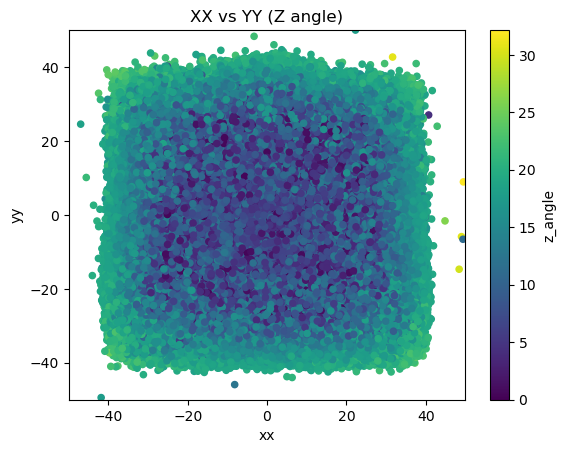

In [14]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.get3DScatterPlot(["xx","yy","z_angle"],"XX vs YY (Z angle)",(-50,50),(-50,50))

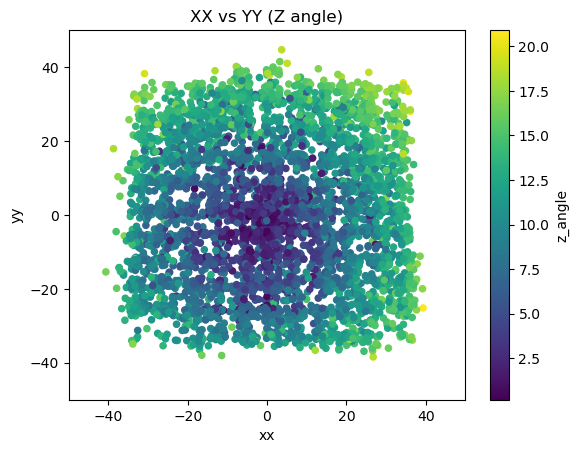

In [15]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("SmallCounter",120,">=")
mdfo_lead.get3DScatterPlot(["xx","yy","z_angle"],"XX vs YY (Z angle)",(-50,50),(-50,50))

light leak proof?

Idea of Small counters on top and also bottom of lead brick

In [ ]:
bins = 11
xybins = np.linspace(-40,40,bins)
labels = [i for i in range(1,bins+1)]
labels =[1,2,3,4]
df1['binned'] = pd.cut(df1['Score'], bins,labels=labels)
print(df1)

In [101]:
import plotly.express as px

def doTomography(bins, mdf, title):
    fig = px.density_heatmap(mdf, x="xx", y="yy", title=title, nbinsx=bins, nbinsy=bins,
                             marginal_x="histogram", marginal_y="histogram")
    
    fig.update_layout(
    xaxis_title="XView (cm)",
    yaxis_title="YView (cm)",
    )
    fig.show()

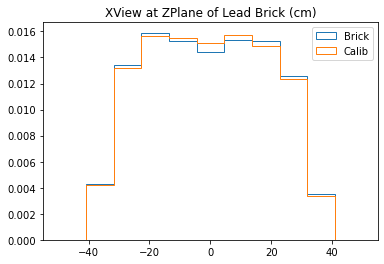

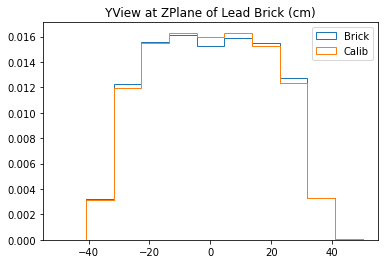

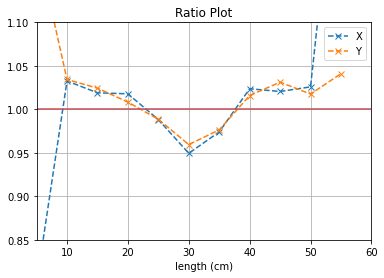

In [63]:
%matplotlib inline
mdfo_lead.reload()
mdfo_calib.reload()

testTomogram(mdfo_lead,mdfo_calib,bins=11)
#doTomography(22, mdfo_lead.events_df, "Lead Bricks")

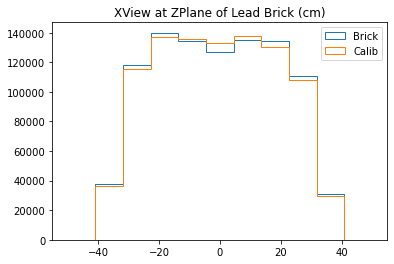

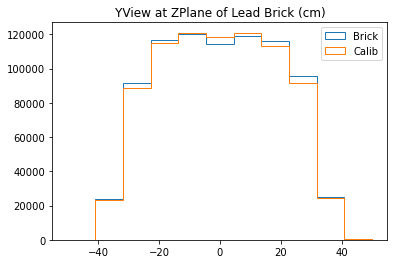

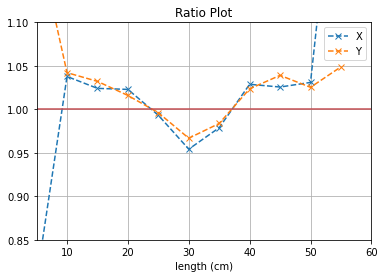

In [64]:
testTomogramRaw(mdfo_lead,mdfo_calib,bins=11)

With no cuts made, we get the following dimensions:

Y(22.3,38.1) = 15.8 cm

X(23.1,37.7) = 14.6 cm

## Testing Muons within 5 to 10 degree zenith angles

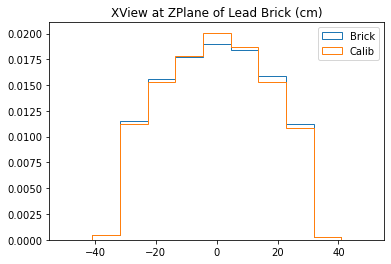

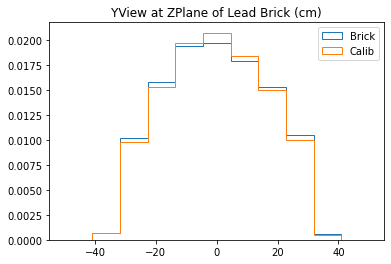

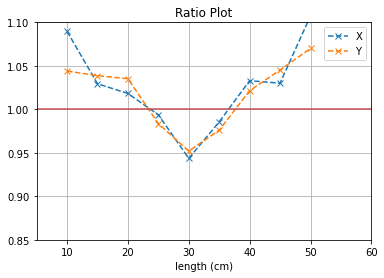

In [21]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("z_angle",5,">=")
mdfo_lead.keepEvents("z_angle",10,"<=")

mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("z_angle",5,">=")
mdfo_calib.keepEvents("z_angle",10,"<=")

testTomogram(mdfo_lead,mdfo_calib,bins=11)
#doTomography(22, mdfo_lead.events_df, "Lead Bricks")

In [110]:
#doTomography(22, mdfo_calib.events_df, "No Lead Bricks")

## Testing Faster Muons

Assuming faster muons are muons with low Sum TDCs. We will make a cut of less than equal to the mean.

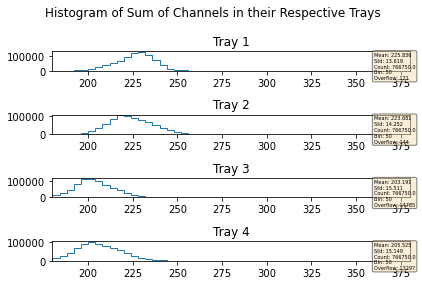

In [22]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()

mdfo_lead.getChannelSumPlots()

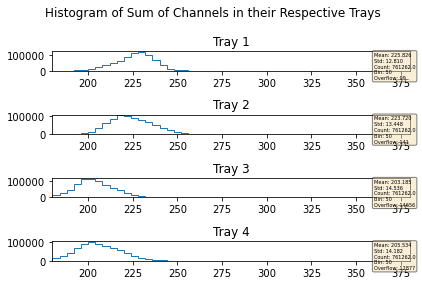

In [23]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()

mdfo_calib.getChannelSumPlots()

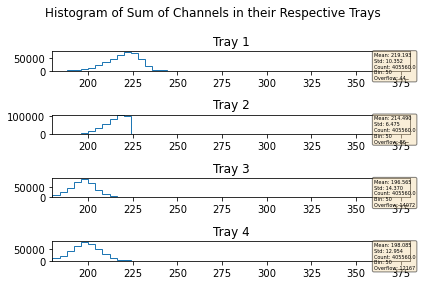

In [24]:
mdfo_lead.keepEvents("sumL2",223,"<=")
mdfo_lead.getChannelSumPlots()

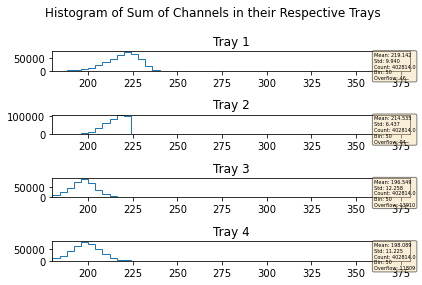

In [25]:
mdfo_calib.keepEvents("sumL2",223,"<=")
mdfo_calib.getChannelSumPlots()

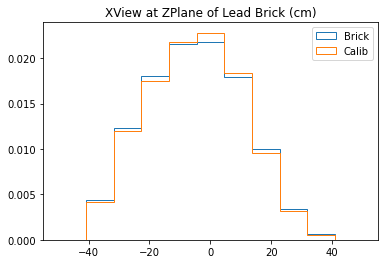

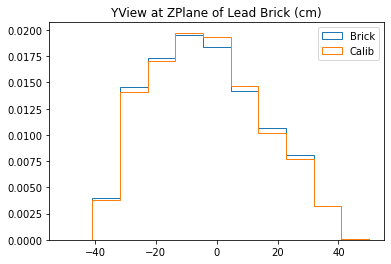

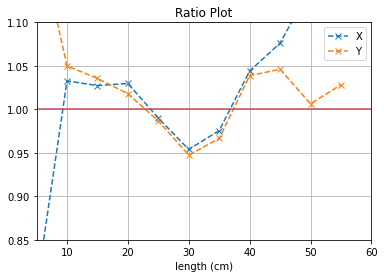

In [26]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL2",223,"<=")


mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL2",223,"<=")

testTomogram(mdfo_lead,mdfo_calib,bins=11)
#doTomography(22, mdfo_lead.events_df, "Lead Bricks")

Limiting to straight muons.

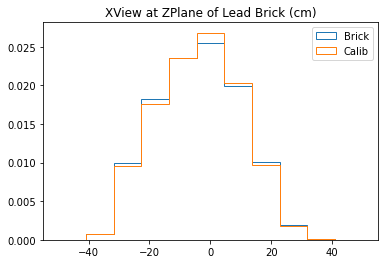

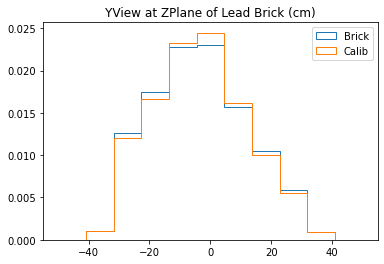

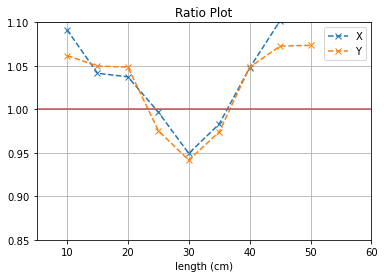

In [27]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL2",223,"<=")
mdfo_lead.keepEvents("z_angle",5,">=")
mdfo_lead.keepEvents("z_angle",10,"<=")

mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL2",223,"<=")
mdfo_calib.keepEvents("z_angle",5,">=")
mdfo_calib.keepEvents("z_angle",10,"<=")

testTomogram(mdfo_lead,mdfo_calib,bins=11)
#doTomography(22, mdfo_lead.events_df, "Lead Bricks")

The dimensions appear to be shorter than actual

## Testing Slower Muons

Assuming slower muons are muons with high Sum TDCs. We will make a cut of greater than equal to the mean.

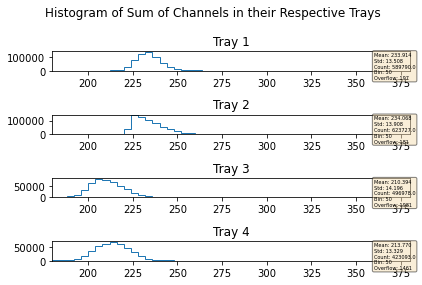

In [28]:
mdfo_lead.reload()
mdfo_lead.keepEvents("sumL2",223,">=")
mdfo_lead.getChannelSumPlots()

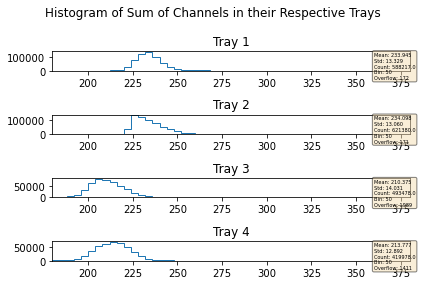

In [29]:
mdfo_calib.reload()
mdfo_calib.keepEvents("sumL2",223,">=")
mdfo_calib.getChannelSumPlots()

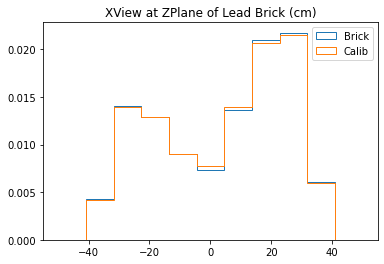

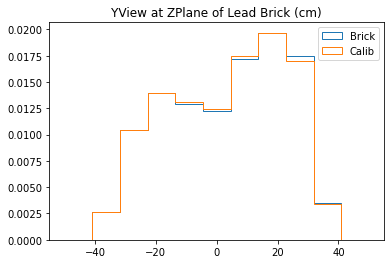

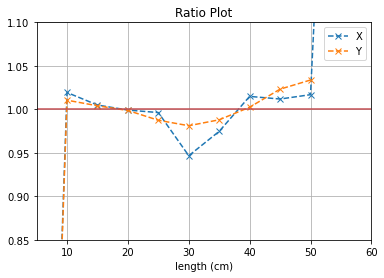

In [30]:
%matplotlib inline
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL2",223,">=")


mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL2",223,">=")

testTomogram(mdfo_lead,mdfo_calib,bins=11)
#doTomography(22, mdfo_lead.events_df, "Lead Bricks")

X View: 19.8 cm

Y View: 18.8 cm

The results with slow muons are much better which are expected since more of such classes of muons have not passed through the lead bricks.

## Same Analysis but now with time restrictions

Keeping all data that is within 4 days of operation.

In [31]:
mdfo_lead.reload()
mdfo_calib.reload()

In [32]:
fourDays = 345600000000 #microseconds

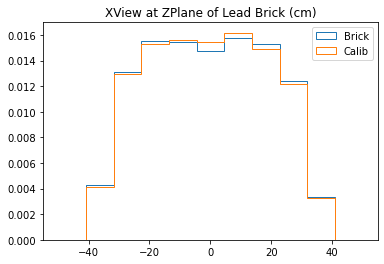

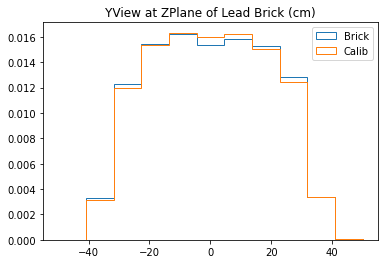

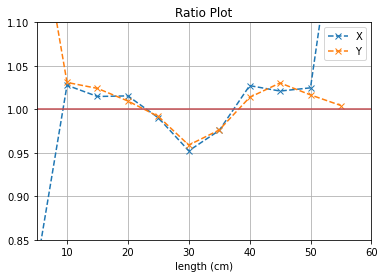

In [33]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keepEvents("event_time",fourDays,"<=")
mdfo_lead.keep4by4Events()

mdfo_calib.keepEvents("event_time",fourDays,"<=")
mdfo_calib.keep4by4Events()

testTomogram(mdfo_lead,mdfo_calib,bins=11)

### Keeping Slower Muons

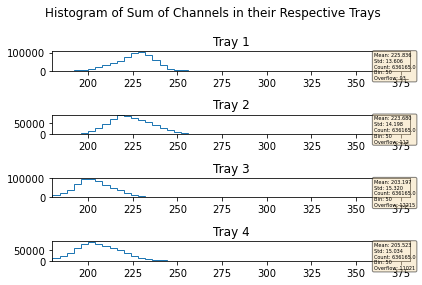

In [34]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("event_time",fourDays,"<=")
mdfo_lead.getChannelSumPlots()

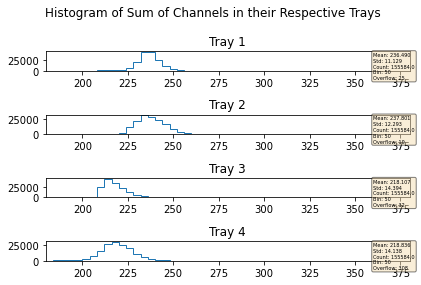

In [35]:
mdfo_lead.keepEvents("event_time",fourDays,"<=")
mdfo_lead.keepEvents("sumL2",223,">=")
mdfo_lead.keepEvents("sumL3",210,">=")
mdfo_lead.getChannelSumPlots()

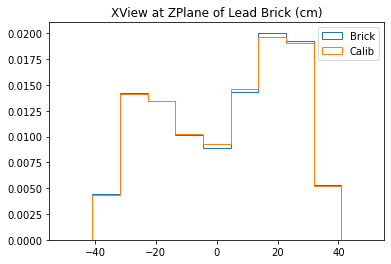

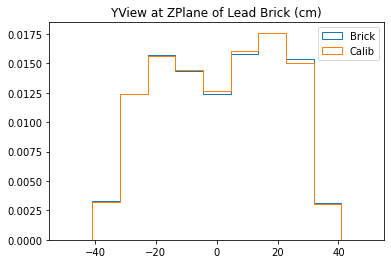

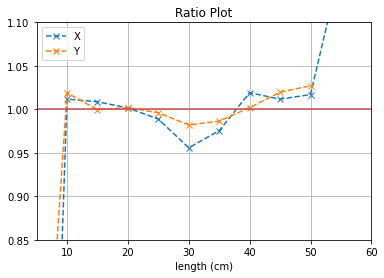

In [36]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("event_time",fourDays,"<=")
mdfo_lead.keepEvents("sumL2",220,">=")

mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("event_time",fourDays,"<=")
mdfo_calib.keepEvents("sumL2",220,">=")


testTomogram(mdfo_lead,mdfo_calib,bins=11)

The length seems to be extracted pretty well.

## Analysis with same Muon numbers

Seeing the number of 4 by 4 muons.

In [37]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
m1 = mdfo_lead.events_df
ms1 = len(m1.index)
ms1

766750

In [38]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()
m2 = mdfo_calib.events_df
ms2 = len(m2.index)
ms2

761262

In [39]:
muon_num = min(ms2,ms1)
muon_num

761262

### Density Plot

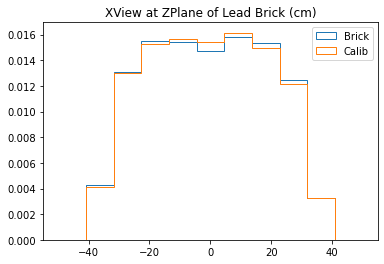

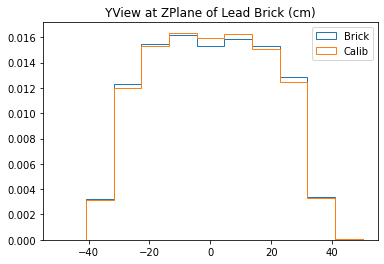

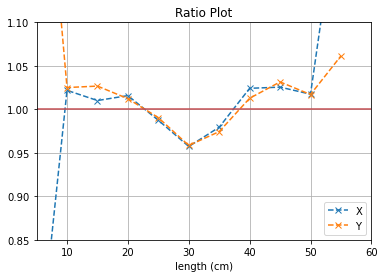

In [43]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("event_num",muon_num,"<=")

mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("event_num",muon_num,"<=")

testTomogram(mdfo_lead,mdfo_calib,bins=11)

### Actual Numbers

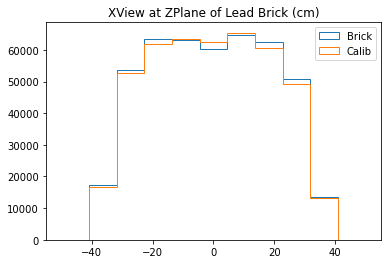

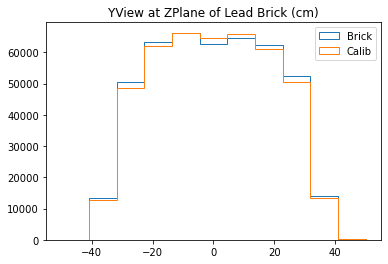

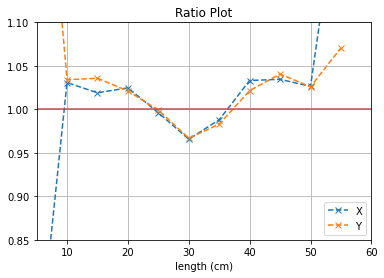

In [44]:
testTomogramRaw(mdfo_lead,mdfo_calib,bins=11)

### Actual Numbers for slow muons analysis

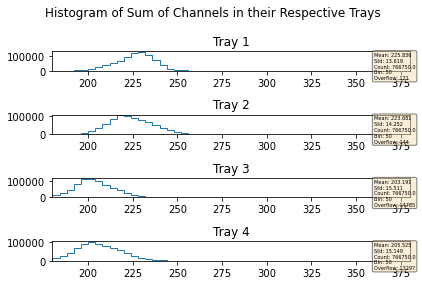

In [54]:
mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.getChannelSumPlots()

In [59]:
tdc_thresh = 220

mdfo_lead.reload()
mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL1",tdc_thresh,">=")


m1 = mdfo_lead.events_df
ms1 = len(m1.index)
ms1

567346

In [60]:
mdfo_calib.reload()
mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL1",tdc_thresh,">=")


m2 = mdfo_calib.events_df
ms2 = len(m2.index)
ms2

562260

In [61]:
muon_num = min(ms2,ms1)
muon_num

562260

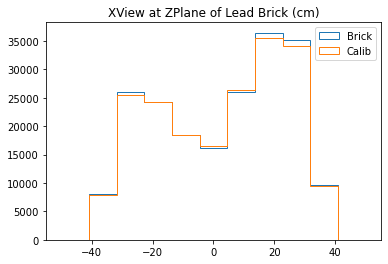

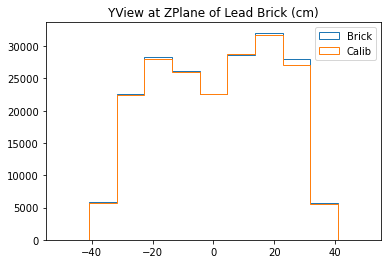

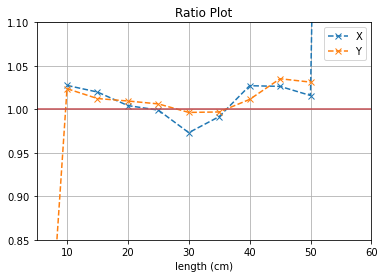

In [62]:
mdfo_lead.reload()
mdfo_calib.reload()

mdfo_lead.keep4by4Events()
mdfo_lead.keepEvents("sumL2",tdc_thresh,">=")
mdfo_lead.keepEvents("event_num",muon_num,"<=")

mdfo_calib.keep4by4Events()
mdfo_calib.keepEvents("sumL2",tdc_thresh,">=")
mdfo_calib.keepEvents("event_num",muon_num,"<=")

testTomogramRaw(mdfo_lead,mdfo_calib,bins=11)

## Full Data Set Comparison

As of 02/32/20 , we have 1.3 Mill $\mu$ events for both lead brick and no lead brick runs.

One observation was that we see more muon events radially away from the region of lead bricks in the X-Y plane. This is predicted since we expect some scattered muon events from the lead bricks to still trigger the system. This may be useful information because we can calculate the angle associated with the effect of the scattering and use that in tomography as well.

# Plans moving forward

### Main Plan
- Clean report ready with 2D histo + resolution val
- Linking TDC info for tomo
    - correct existing
    - get ortho coordinate and generate tomo
- tomogram generation through diffTDC data
- associate muon speed to each event and use this info for tomography
    - generate muon speed dist from data set
- Cuts on temporal space

### Later
- RL work with Cris
- tomogram using discrete angle binned data
- study of factors affecting tomogram generation
- tomogram visualization
- ML applications
- Resolution determination
- Better Muon Track Reco algorithms 